<a href="https://colab.research.google.com/github/akib1162100/ML_base/blob/main/Assign_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
bank_data = pd.read_csv('bank-full.csv',sep=";")

In [3]:
bank_data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#visualize before handeling missing data

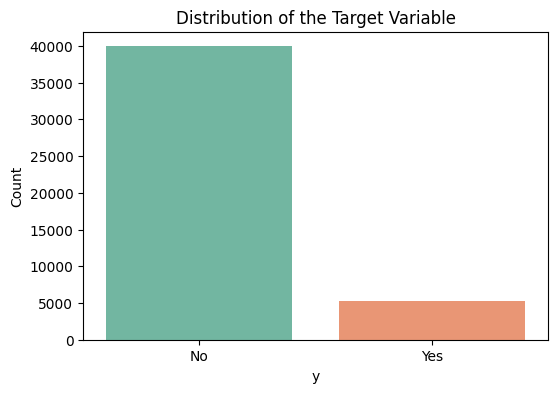

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(data=bank_data, x='y', palette='Set2')
plt.title('Distribution of the Target Variable')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

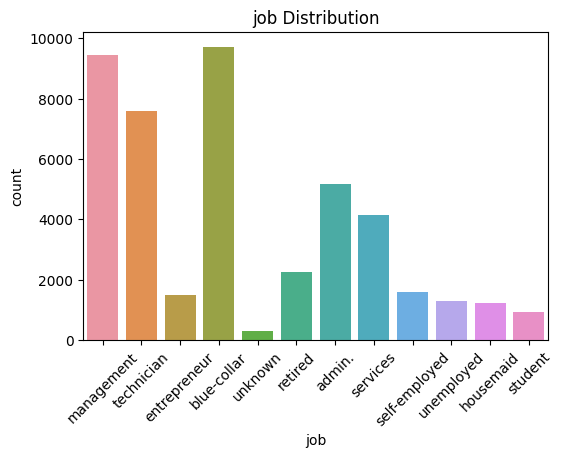

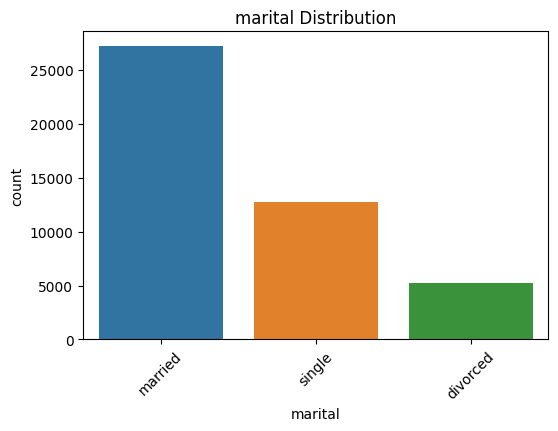

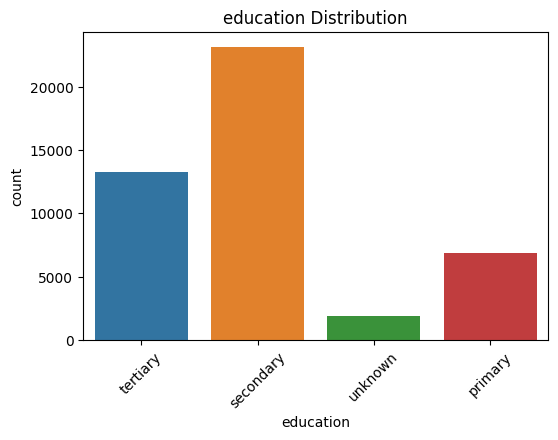

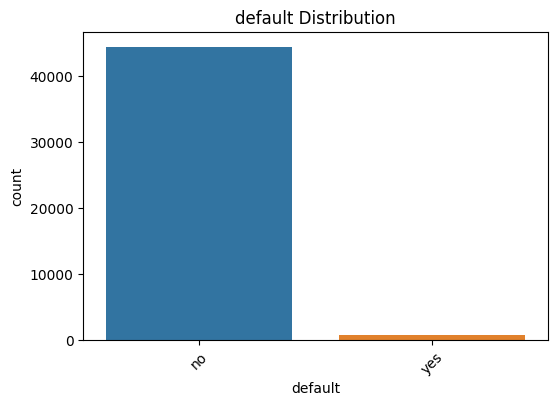

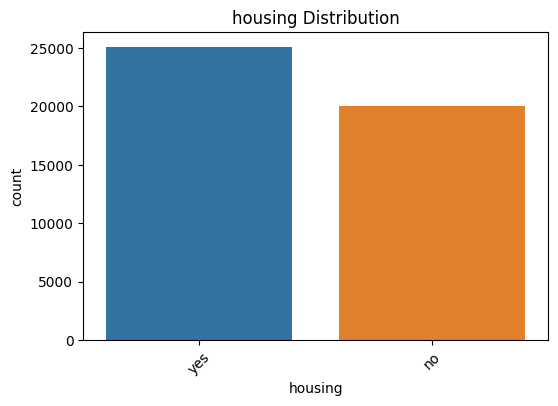

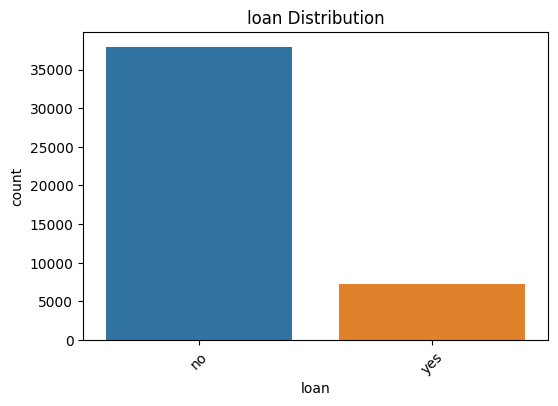

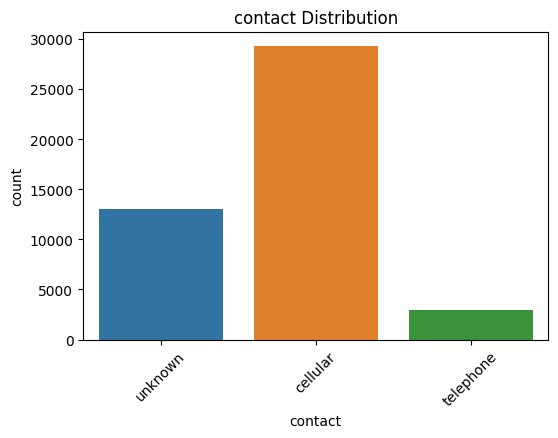

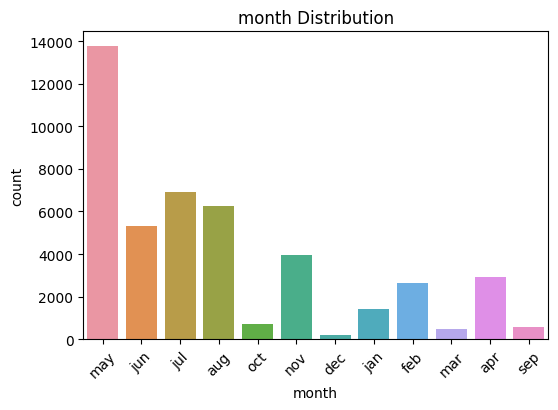

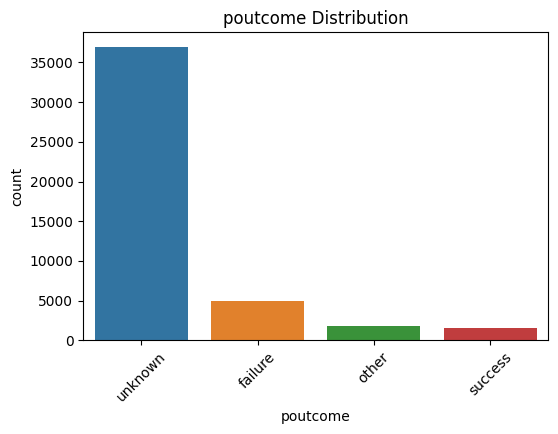

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=bank_data, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

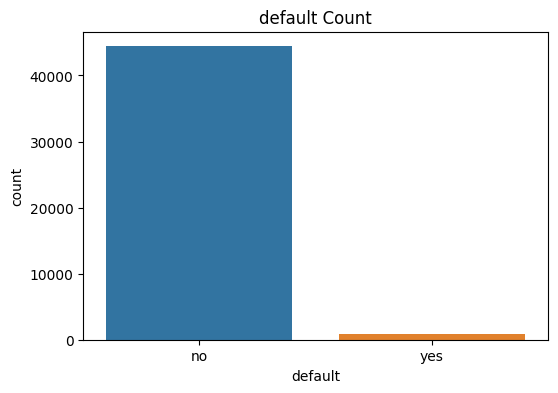

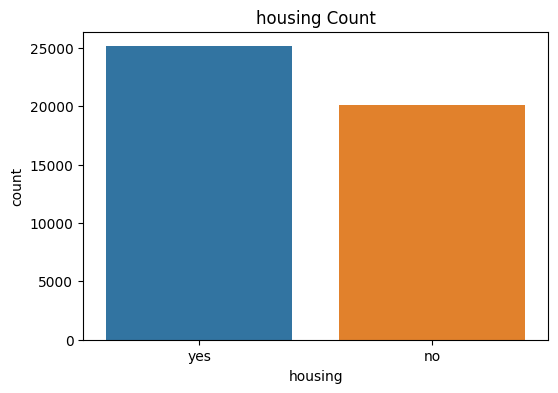

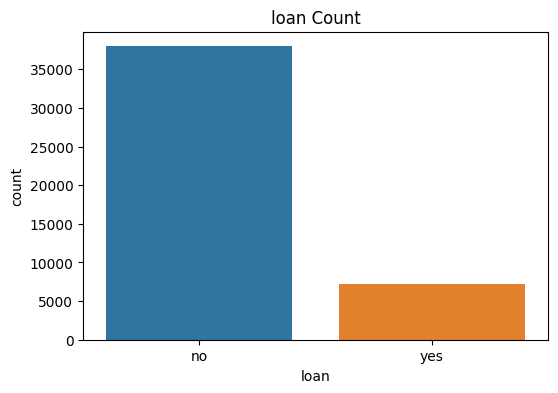

In [6]:
binary_columns = ['default', 'housing', 'loan']

for col in binary_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=bank_data, x=col)
    plt.title(f"{col} Count")
    plt.show()

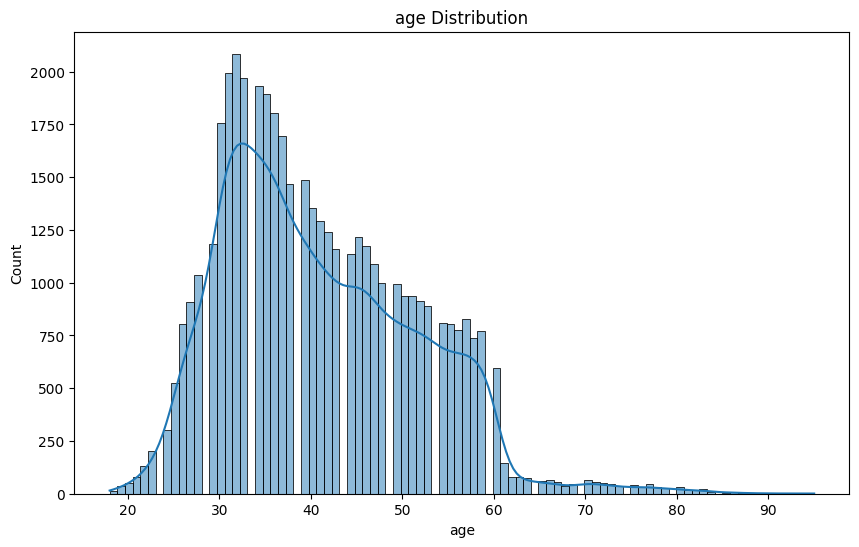

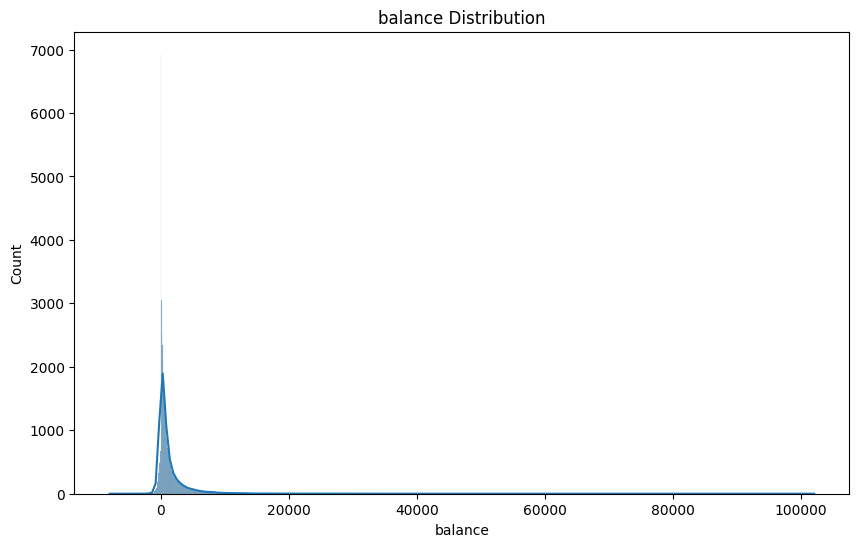

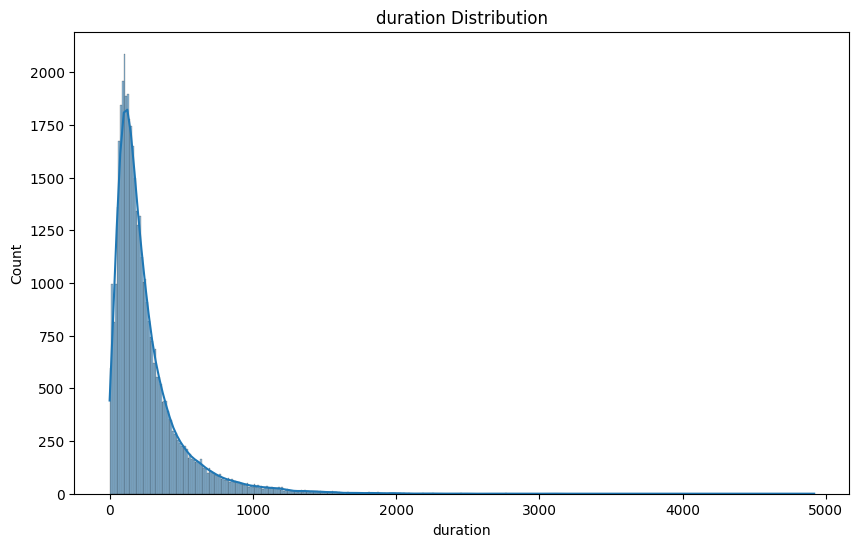

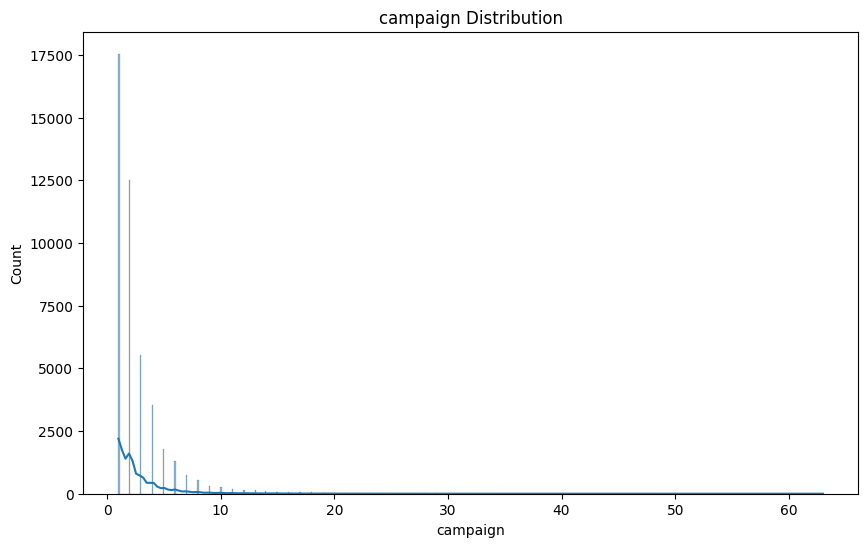

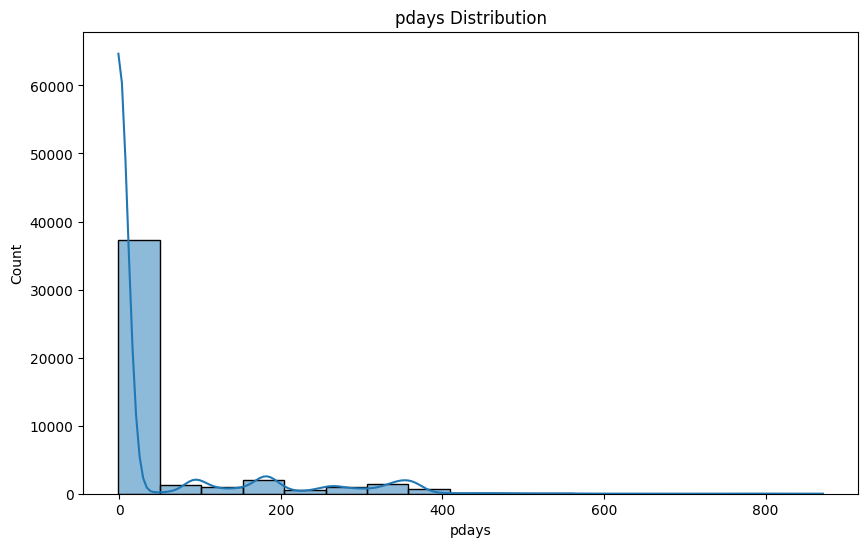

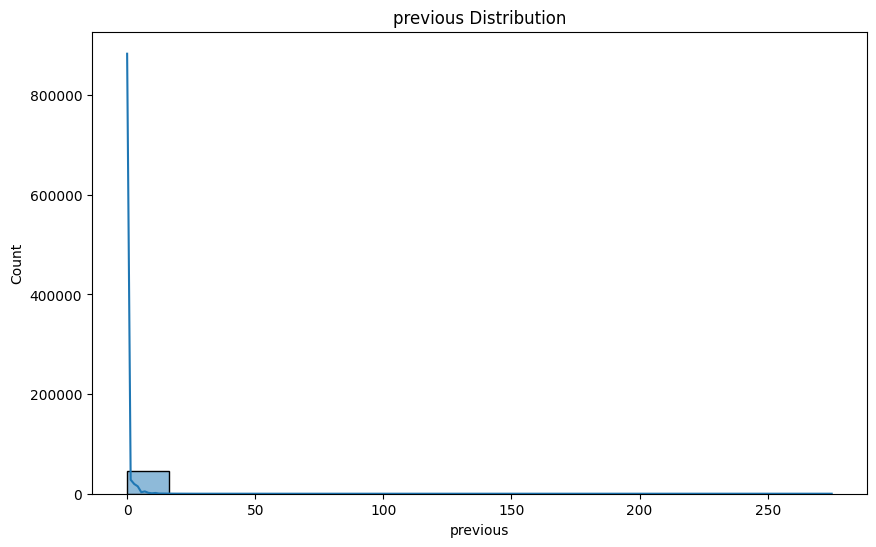

In [7]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=bank_data, x=col, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

#handle missing data

In [8]:
(bank_data == 'unknown').sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [9]:
# Assuming you have a DataFrame named df containing your data

# Create a dictionary mapping job to the corresponding mode of education
job_to_mode_education = bank_data.groupby('job')['education'].agg(lambda x: x.mode().iloc[0]).to_dict()

# Replace "unknown" values in the "education" column with the mode education for the respective job
bank_data['education'] = bank_data.apply(lambda row: job_to_mode_education[row['job']] if row['education'] == 'unknown' else row['education'], axis=1)
bank_data['job'] = bank_data.apply(lambda row: row['education'] if row['job'] == 'unknown' else row['job'], axis=1)

In [10]:
(bank_data == 'unknown').sum()

age              0
job            127
marital          0
education      127
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [11]:
bank_data.drop(['poutcome'],axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [12]:
# Impute missing values in numerical columns with the median
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
bank_data[numerical_columns] = bank_data[numerical_columns].replace('unknown', bank_data[numerical_columns].median())

# Impute missing values in categorical columns with the mode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month']
bank_data[categorical_columns] = bank_data[categorical_columns].replace('unknown', bank_data[categorical_columns].mode().iloc[0])

In [13]:
(bank_data == 'unknown').sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

#visualize after handeling missing data

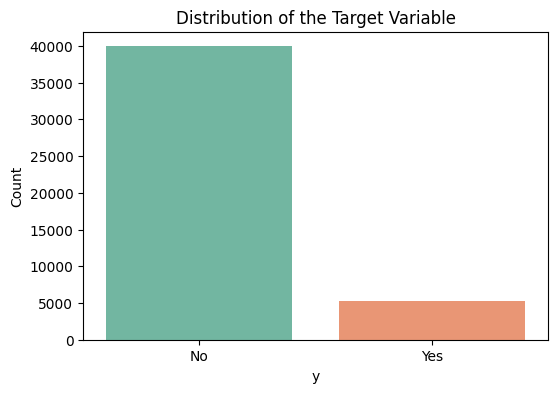

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=bank_data, x='y', palette='Set2')
plt.title('Distribution of the Target Variable')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

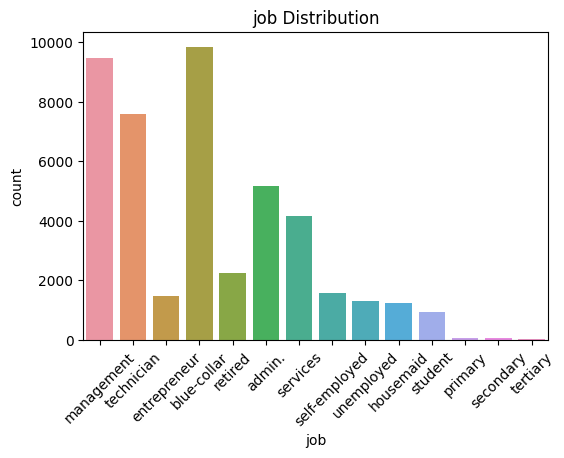

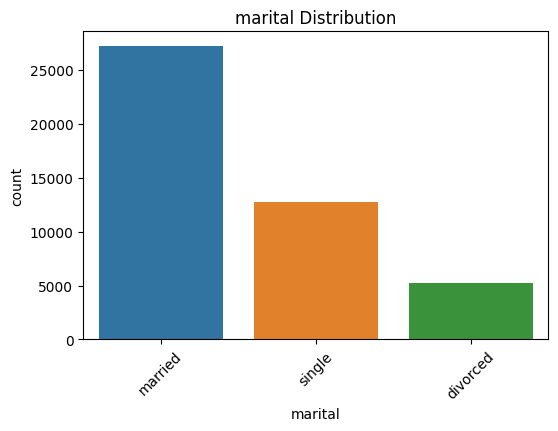

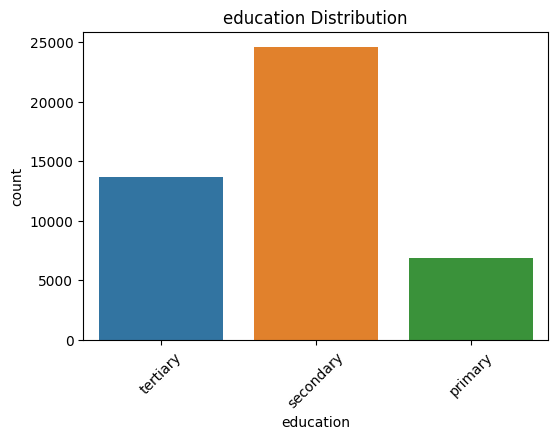

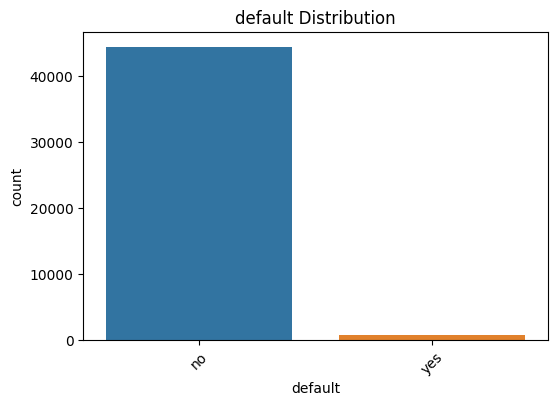

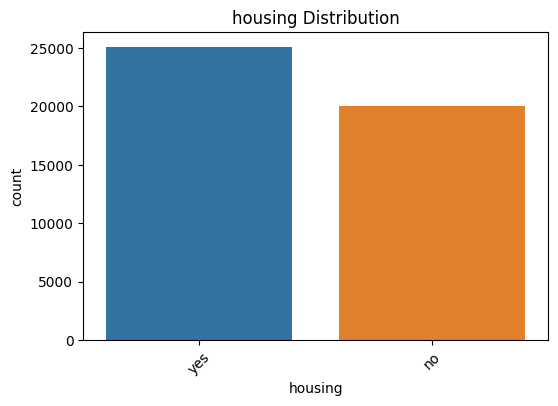

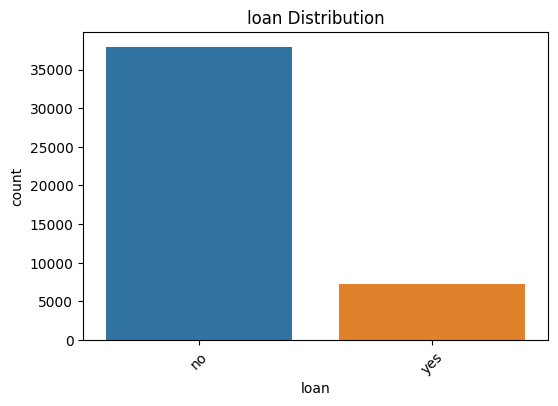

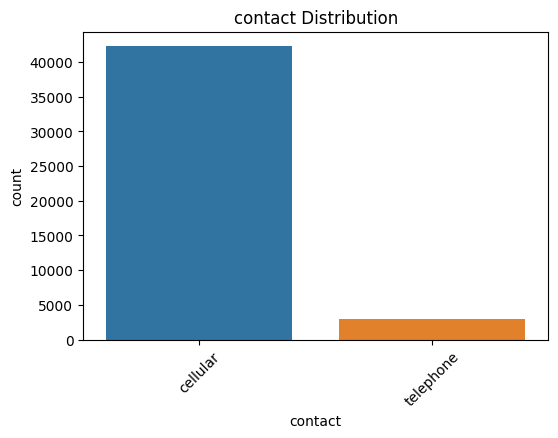

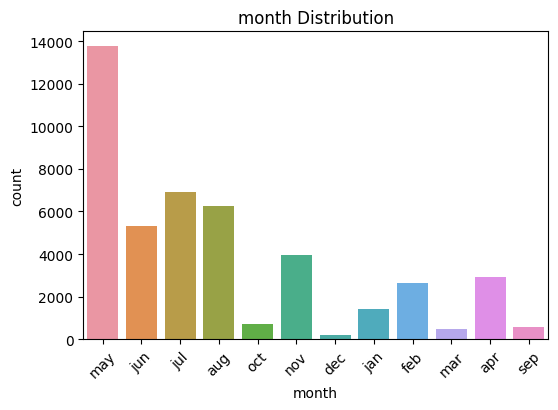

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=bank_data, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

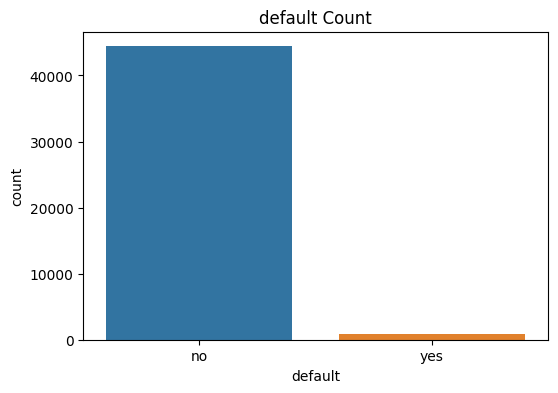

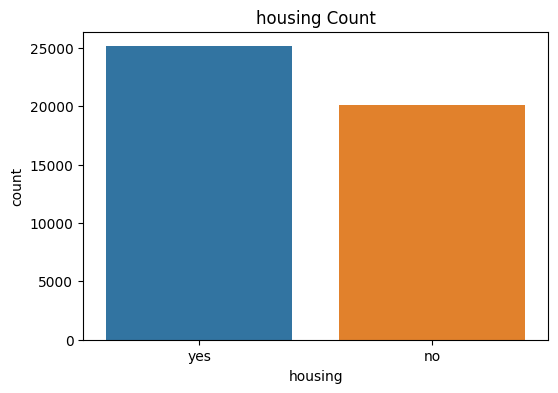

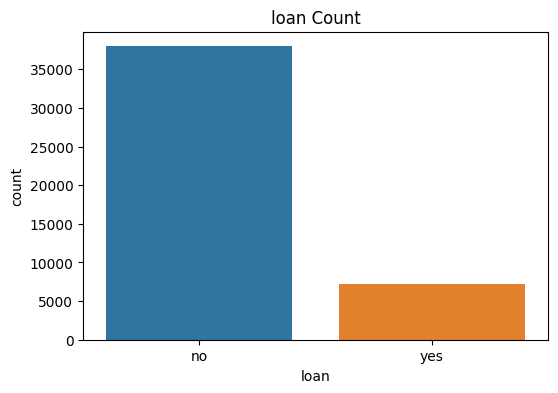

In [16]:
binary_columns = ['default', 'housing', 'loan']

for col in binary_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=bank_data, x=col)
    plt.title(f"{col} Count")
    plt.show()

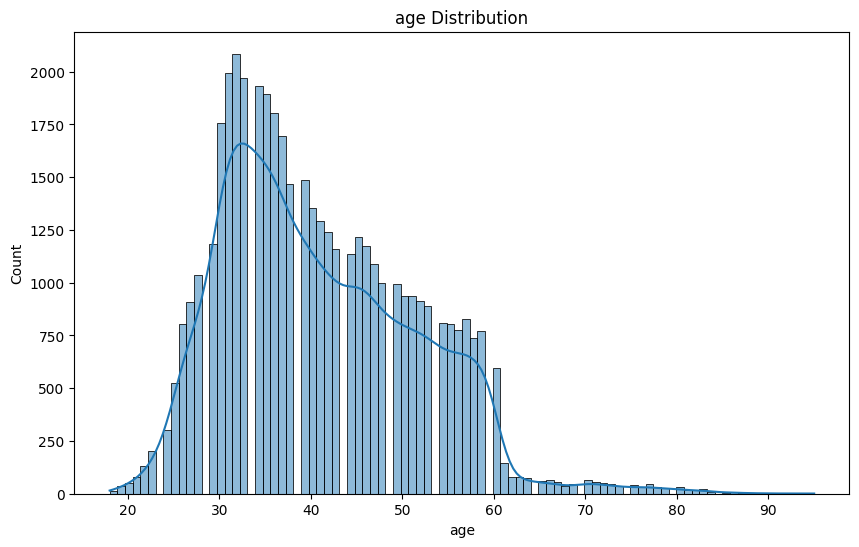

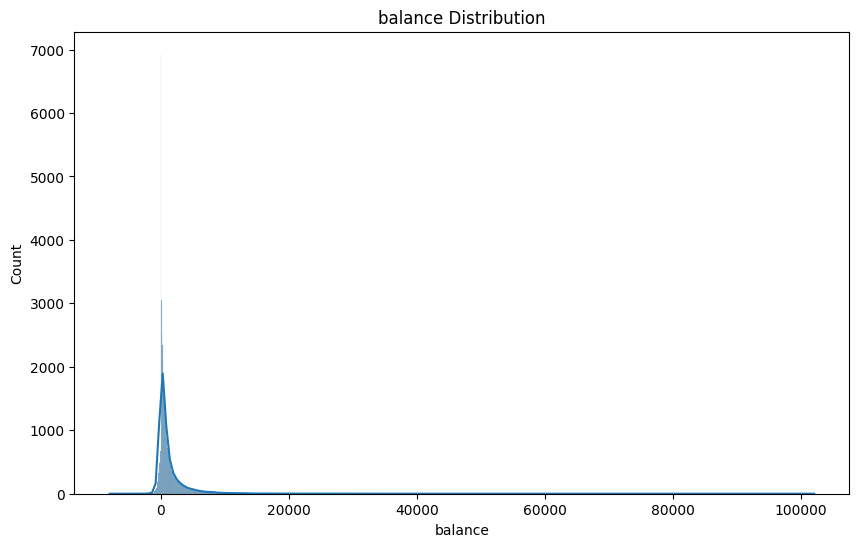

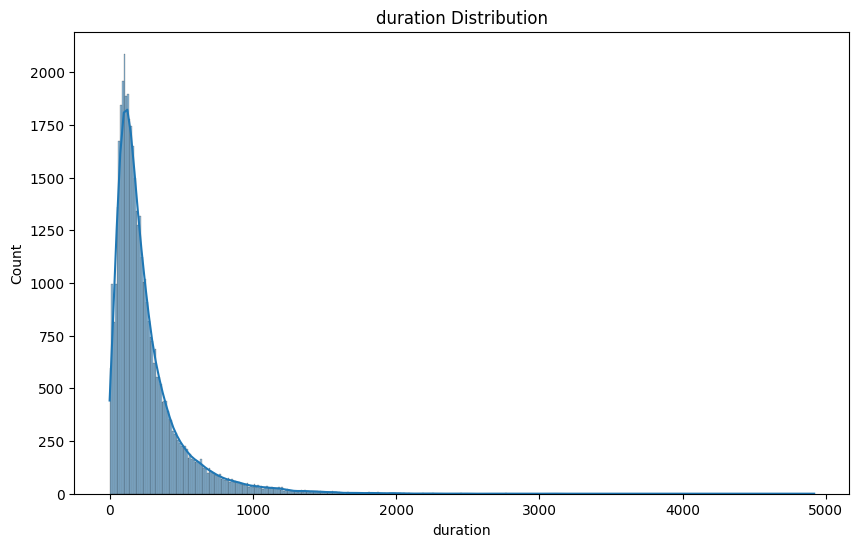

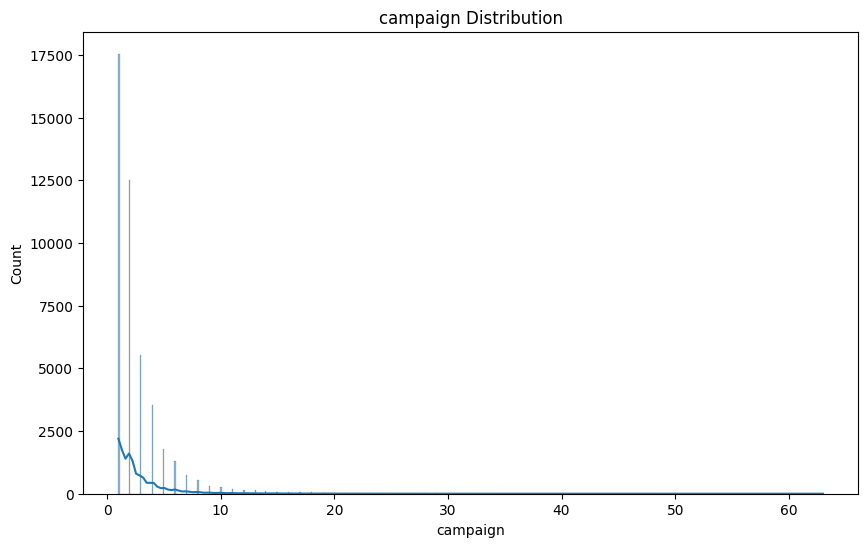

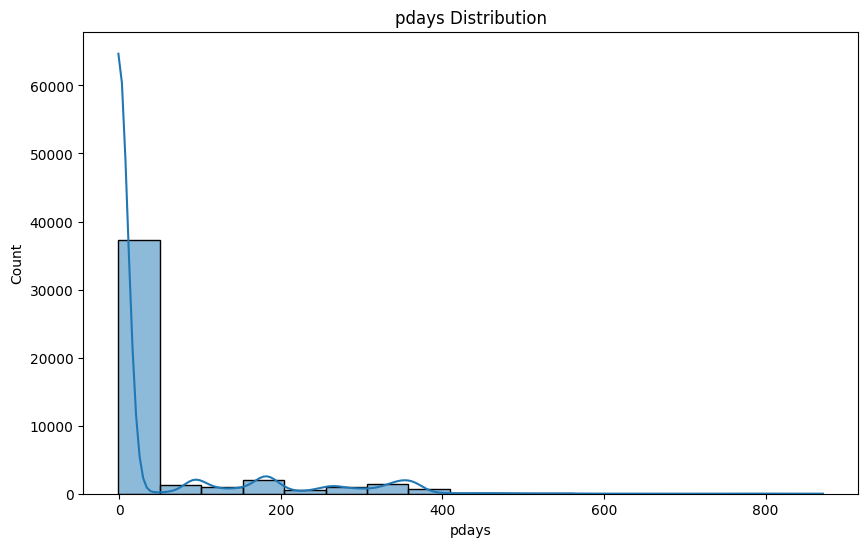

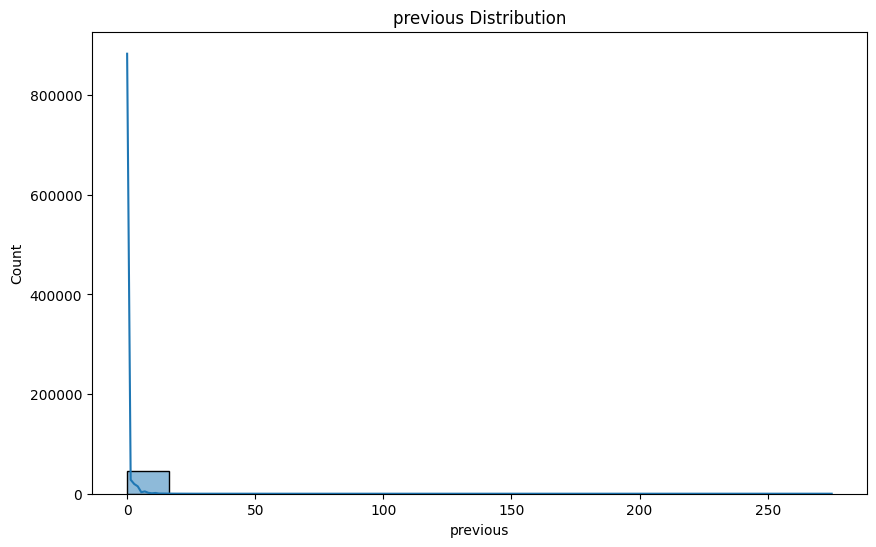

In [17]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=bank_data, x=col, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

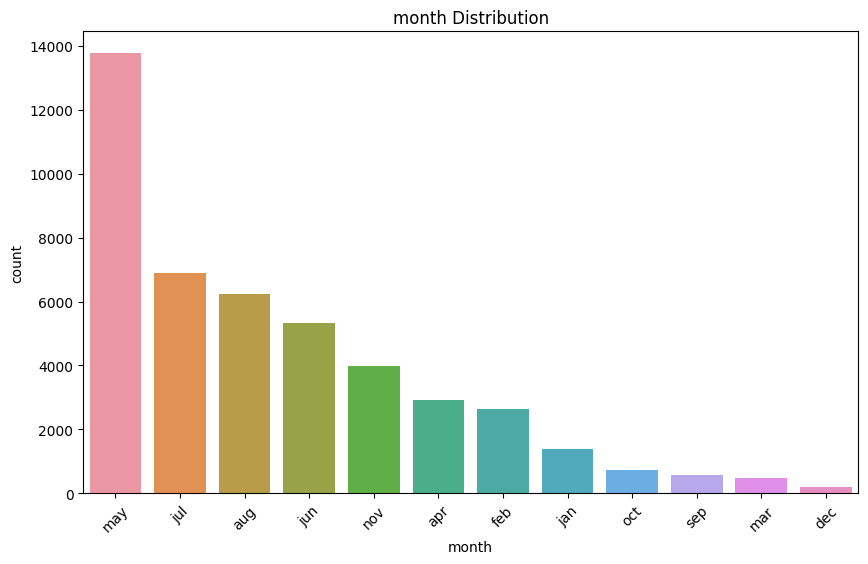

In [18]:
time_series_columns = ['month']

for col in time_series_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=bank_data, x=col, order=bank_data[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

#Encoding And Balancing

In [19]:
# job_mapping = {
#     'housemaid': 6,
#     'student': 2,
#     'blue-collar': 8,
#     'self-employed': 9,
#     'entrepreneur': 13,
#     'services': 10,
#     'admin.': 14,
#     'technician': 11,
#     'retired': 7,
#     'unemployed': 1,
#     'management': 12,
#     'primary': 3,
#     'secondary': 4,
#     'tertiary': 5
# }
# marital_mapping = {'single': 1, 'divorced': 2, 'married': 3}
# education_mapping = {'primary': 1, 'secondary': 2, 'tertiary': 3}
# housing_mapping = {'no': 0, 'yes': 1}


In [20]:

Y = bank_data['y'].apply(lambda x: 1 if x == "yes" else 0).astype(int)
X = bank_data.drop(columns=['y','poutcome'])

categorical_columns = ['job','marital','education','default','housing', 'loan', 'contact', 'month']
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# X_encoded['job'] = X_encoded['job'].map(job_mapping)
# X_encoded['marital'] = X_encoded['marital'].map(marital_mapping)
# X_encoded['education'] = X_encoded['education'].map(education_mapping)
# X_encoded['housing'] = X_encoded['housing'].map(housing_mapping)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, Y)




In [21]:
from sklearn.model_selection import train_test_split
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
y_resampled_df = pd.DataFrame({'y': y_resampled})
resampled_data = pd.concat([X_resampled, y_resampled_df], axis=1)

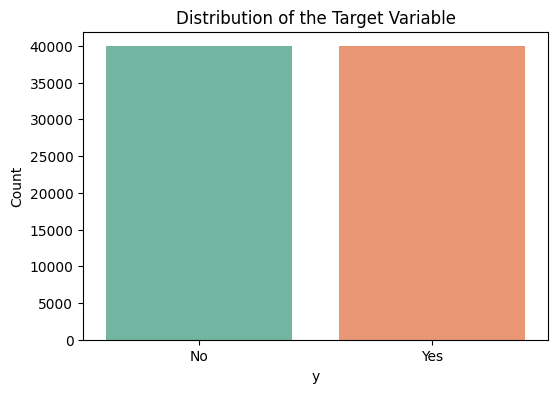

In [23]:
y_resampled_plot = pd.Series(y_resampled).map({0: 'no', 1: 'yes'}).values
y_resampled_plot_df = pd.DataFrame({'yes_and_no': y_resampled_plot})
plt.figure(figsize=(6, 4))
sns.countplot(data=y_resampled_plot_df, x='yes_and_no', palette='Set2')
plt.title('Distribution of the Target Variable')
plt.xlabel('y')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [24]:
resampled_data.head(20)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,33,1,5,198,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,35,231,5,139,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,28,447,5,217,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,42,2,5,380,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,58,121,5,50,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,43,593,5,55,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#R&D

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X_train_temp, y_train_temp, X_val, y_val from the previous steps

# Define the classifiers and their respective hyperparameter grids for tuning
classifiers = {
    'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'PCA': Pipeline([('pca', PCA()), ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))])
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'PCA': {'pca__n_components': [5, 10, 15], 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
}

# Perform grid search and fine-tune the models using the validation set
best_models = {}

for name, classifier in classifiers.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_temp, y_train_temp)

    best_models[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best accuracy on validation set: {grid_search.best_score_:.4f}\n")

# Evaluate the best models on the validation set
for name, model in best_models.items():
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{name} - Validation Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_val, y_val_pred)}\n")


Best parameters for Logistic Regression: {'C': 10}
Best accuracy on validation set: 0.9363

Best parameters for Decision Tree: {'max_depth': None}
Best accuracy on validation set: 0.9196

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best accuracy on validation set: 0.9454

Best parameters for PCA: {'classifier__C': 0.01, 'pca__n_components': 15}
Best accuracy on validation set: 0.8826

Logistic Regression - Validation Accuracy: 0.9338
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      5936
           1       0.96      0.90      0.93      6041

    accuracy                           0.93     11977
   macro avg       0.94      0.93      0.93     11977
weighted avg       0.94      0.93      0.93     11977


Decision Tree - Validation Accuracy: 0.9162
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5936
   

In [26]:
# Assuming you have X_test and y_test from the previous steps

# Evaluate the best models on the test set
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name} - Test Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}\n")

Logistic Regression - Test Accuracy: 0.9330
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      6037
           1       0.96      0.91      0.93      5940

    accuracy                           0.93     11977
   macro avg       0.93      0.93      0.93     11977
weighted avg       0.93      0.93      0.93     11977


Decision Tree - Test Accuracy: 0.9193
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6037
           1       0.91      0.93      0.92      5940

    accuracy                           0.92     11977
   macro avg       0.92      0.92      0.92     11977
weighted avg       0.92      0.92      0.92     11977


Random Forest - Test Accuracy: 0.9469
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6037
           1       0.96      0.93      0.95   

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have X_test and y_test from the previous steps

# Evaluate the best models on the test set
for name, model in best_models.items():
    y_test_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    print(f"{name} - Test Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

Logistic Regression - Test Metrics:
Accuracy: 0.9330
Precision: 0.9566
Recall: 0.9059
F1-Score: 0.9306
ROC-AUC: 0.9809
Confusion Matrix:
[[5793  244]
 [ 559 5381]]


Decision Tree - Test Metrics:
Accuracy: 0.9193
Precision: 0.9107
Recall: 0.9283
F1-Score: 0.9194
ROC-AUC: 0.9193
Confusion Matrix:
[[5496  541]
 [ 426 5514]]


Random Forest - Test Metrics:
Accuracy: 0.9469
Precision: 0.9638
Recall: 0.9278
F1-Score: 0.9454
ROC-AUC: 0.9894
Confusion Matrix:
[[5830  207]
 [ 429 5511]]


PCA - Test Metrics:
Accuracy: 0.8839
Precision: 0.8853
Recall: 0.8798
F1-Score: 0.8825
ROC-AUC: 0.9465
Confusion Matrix:
[[5360  677]
 [ 714 5226]]




In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV for Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train_temp, y_train_temp)

# Print the best hyperparameters
print("Best parameters for Random Forest:", random_search_rf.best_params_)

# Evaluate the model with the best hyperparameters on the validation set
y_val_pred_rf = random_search_rf.best_estimator_.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest with Tuned Hyperparameters - Validation Accuracy: {accuracy_rf:.4f}")
print(f"Classification Report:\n{classification_report(y_val, y_val_pred_rf)}\n")

# Save the best Random Forest model
best_models['Random Forest'] = random_search_rf.best_estimator_



Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest with Tuned Hyperparameters - Validation Accuracy: 0.9430
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5936
           1       0.96      0.93      0.94      6041

    accuracy                           0.94     11977
   macro avg       0.94      0.94      0.94     11977
weighted avg       0.94      0.94      0.94     11977




In [29]:
y_test_pred = random_search_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"{name} - Test Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\n")

PCA - Test Metrics:
Accuracy: 0.9474
Precision: 0.9621
Recall: 0.9306
F1-Score: 0.9461
ROC-AUC: 0.9465
Confusion Matrix:
[[5819  218]
 [ 412 5528]]




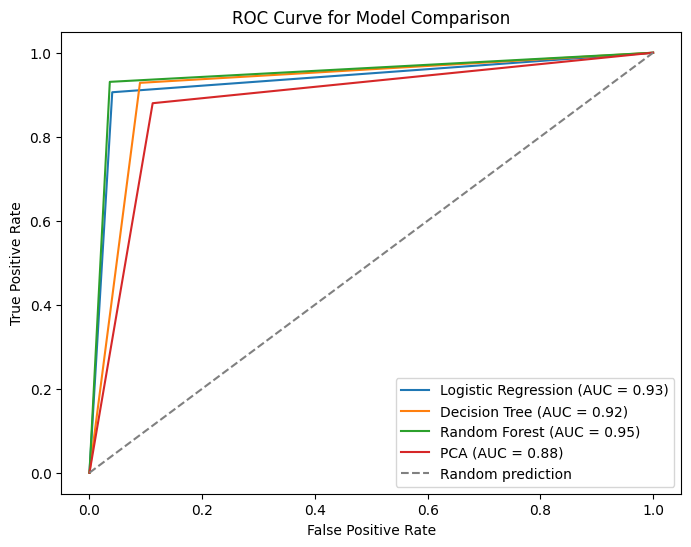

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for name, model in best_models.items():
  y_test_pred = model.predict(X_test)
  auc = roc_auc_score(y_test, y_test_pred)
  frp,trp,_ = roc_curve(y_test, y_test_pred)
  plt.plot(frp, trp, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], '--', color='gray', label='Random prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Comparison')
plt.legend()
plt.show()

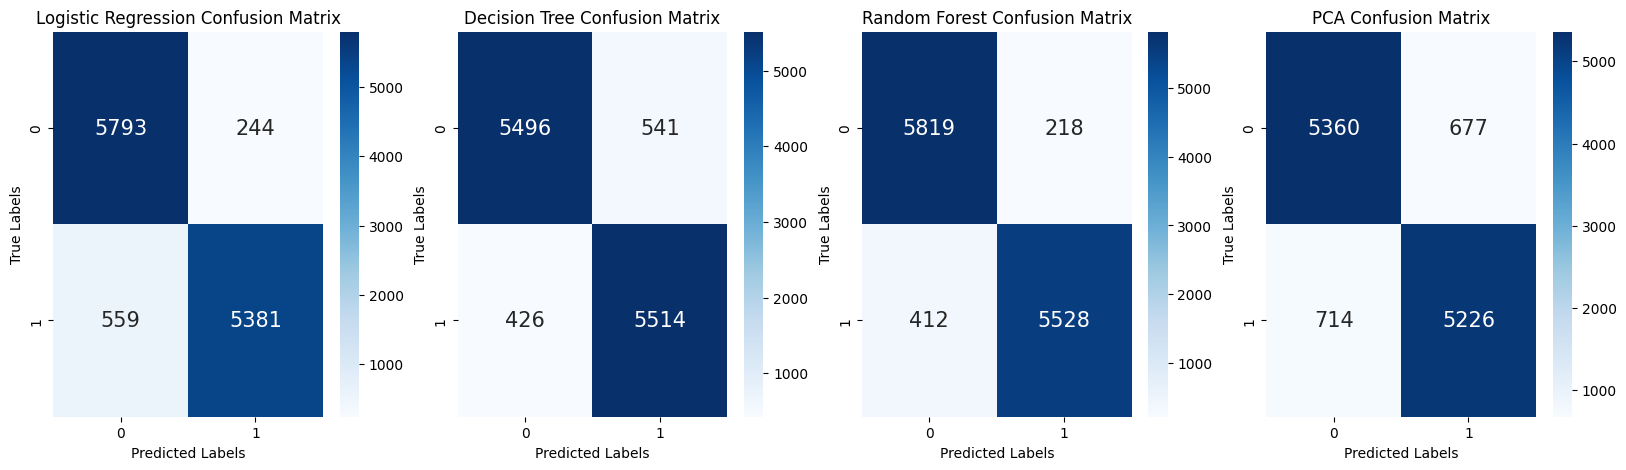

In [36]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, len(best_models), figsize=(20, 5))
index = 0
for name, model in best_models.items():
  y_test_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_test_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15}, ax=axes[index])
  axes[index].set_title(f'{name} Confusion Matrix')
  axes[index].set_xlabel('Predicted Labels')
  axes[index].set_ylabel('True Labels')
  index+=1